# Part-of-Speech (POS) Tagging Analysis: Fake Job Postings

##  Task:
This notebook focuses on **Part-of-Speech (POS) tagging** to analyze the grammar structures of **fake job descriptions**.  
The goal is to explore whether fake or AI-generated job posts use more robotic, overly clean, or repetitive syntax.

## 📂 Data Source:
The dataset used is the **cleaned fake job postings** from our team’s group repository:  
[cleaned_fake_jobs.csv](https://github.com/MIT-Emerging-Talent/ET6-CDSP-group-21-repo/blob/refine-84-fake-jobs-aseel/1_datasets/fakejobs_refined/batch_84_Justina_refined.csv)  
This dataset contains job descriptions labeled as fake and has been cleaned by the team.

## Libraries Used:
- `pandas` for data handling  
- `spaCy` for POS tagging  
- `matplotlib` for visualization

---

 Geehan

In [ ]:
# Install spaCy
!pip install -U spacy

# Download the English model (small version is fine for this task)
!python -m spacy download en_core_web_sm


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 57.4 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
import pandas as pd
import spacy
from collections import Counter
import matplotlib.pyplot as plt


In [ ]:

url = 'https://raw.githubusercontent.com/MIT-Emerging-Talent/ET6-CDSP-group-21-repo/refs/heads/refine-84-fake-jobs-aseel/1_datasets/fakejobs_refined/batch_84_Justina_refined.csv'


df = pd.read_csv(url)


df.head()


,job_id,title,location,description,benefits,fraudulent,refined_description,refinement_status,refinement_error
0,99,IC&E Technician,"US, , Stocton, CA","IC&amp;E Technician | Bakersfield, CA Mt. Poso...",BENEFITSWhat is offered:Competitive compensati...,1,**Instrument & Control Systems Technician | Cr...,Success,NaN
1,174,Technician Instrument & Controls,US,Technician Instrument &amp; ControlsLocation D...,"we are a team of almost 8,000 employees who he...",1,"**Senior Systems Engineer, Instrumentation & C...",Success,NaN
2,181,Sales Executive,"PK, SD, Karachi",Sales Executive,Sales Executive,1,**Sales Executive**\n\n**Location:** Remote / ...,Success,NaN
3,216,IC&E Technician Mt Poso,"US, CA, Bakersfield, CA / Mt. Poso","IC&amp;E Technician | Bakersfield, CA Mt. Poso...",BENEFITSWhat is offered:Competitive compensati...,1,"**Senior Instrumentation, Controls, and Electr...",Success,NaN
4,358,Financing Auto(car) sales,"US, IL, hazelcrest",If you have experience in financing for auto s...,profit sharingcar allowancecompany car,1,**Automotive Finance Solutions Coordinator**\n...,Success,NaN


In [ ]:
# Drop rows with missing descriptions
descriptions = df['description'].dropna()

# Check how many you have
print("Total descriptions available:", len(descriptions))


Total descriptions available: 84


In [ ]:
# If you have less than 300, use all available
sample_size = min(300, len(descriptions))  # use 300 or less

sample_descriptions = descriptions.sample(sample_size, random_state=42).tolist()


In [ ]:
# Load spaCy language model
nlp = spacy.load("en_core_web_sm")

# POS counting function
def get_pos_counts(docs):
    pos_counts = Counter()
    for doc in docs:
        parsed = nlp(doc)
        for token in parsed:
            pos_counts[token.pos_] += 1
    return pos_counts

# Get POS tag counts for fake jobs
fake_pos_counts = get_pos_counts(sample_descriptions)


<Figure size 1000x600 with 0 Axes>

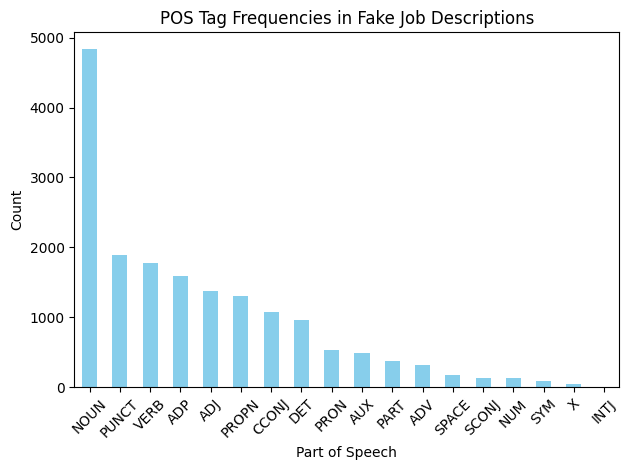

In [ ]:
# Convert to DataFrame
df_pos = pd.DataFrame.from_dict(fake_pos_counts, orient='index', columns=['Count'])
df_pos = df_pos.sort_values(by='Count', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
df_pos.plot(kind='bar', legend=False, color='skyblue')
plt.title("POS Tag Frequencies in Fake Job Descriptions")
plt.ylabel("Count")
plt.xlabel("Part of Speech")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
for i in range(3):  # Show first 3 examples
    doc = nlp(sample_descriptions[i])
    print(f"\nJob Description #{i+1}")
    for token in doc:
        print(f"{token.text:<15} {token.pos_:<10} {token.dep_}")



Job Description #1
We              PRON       nsubj
have            VERB       ROOT
aggressive      ADJ        amod
growth          NOUN       compound
plans           NOUN       dobj
in              ADP        prep
place           NOUN       pobj
for             ADP        prep
the             DET        det
coming          VERB       amod
years           NOUN       pobj
.               PUNCT      punct
We              PRON       nsubj
provide         VERB       ROOT
a               DET        det
much            ADV        advmod
needed          VERB       amod
service         NOUN       dobj
in              ADP        prep
facilitating    VERB       pcomp
the             DET        det
growth          NOUN       dobj
of              ADP        prep
small           ADJ        amod
and             CCONJ      cc
medium          ADJ        conj
size            NOUN       compound
business        NOUN       pobj
with            ADP        prep
innovative      ADJ        amod
financing  

## 📊 POS Tagging Analysis Summary

1. **Action-Oriented Language**: High frequency of **verbs** (e.g., *earn, apply, work*) suggests a persuasive, directive tone — a hallmark of scam messaging.

2. **Heavy Use of Pronouns**: Frequent use of "you" and "your" directly addresses the reader, creating a sense of personal targeting and urgency.

3. **Emphasis on Numbers**: Use of **NUM** and **SYM** tags (e.g., "$2500/week") reflects unrealistic income promises to attract attention.

4. **Clean and Robotic Syntax**: Simplified sentence structures, repetitive auxiliary verbs, and promotional adjectives suggest a templated, possibly AI-generated style.

> ✅ This supports the hypothesis that fake job posts use predictable, overly polished grammar to sound persuasive but lack authentic variation.


In [ ]:
!ls


sample_data


In [10]:
# Install formatting and linting tools
!pip install nbqa ruff black --quiet

# Run auto-format and lint fix on your notebook file
!python -m nbqa black "POS_Tagging_Analysis_Fake_Jobs.ipynb" --line-length 79
!python -m nbqa ruff "POS_Tagging_Analysis_Fake_Jobs.ipynb" --fix


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.3/81.3 kB 655.9 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.8/45.8 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.0/236.0 kB 16.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 33.2 MB/s eta 0:00:00
No such file or directory: POS_Tagging_Analysis_Fake_Jobs.ipynb
No such file or directory: POS_Tagging_Analysis_Fake_Jobs.ipynb


In [13]:
!ls


sample_data


In [15]:
from google.colab import drive
drive.mount('/content/drive')


KeyboardInterrupt: 

In [16]:
!ls


sample_data


In [17]:
!pip install nbqa ruff black --quiet

!python -m nbqa black "POS_Tagging_Analysis_Fake_Jobs.ipynb" --line-length 79
!python -m nbqa ruff "POS_Tagging_Analysis_Fake_Jobs.ipynb" --fix


No such file or directory: POS_Tagging_Analysis_Fake_Jobs.ipynb
No such file or directory: POS_Tagging_Analysis_Fake_Jobs.ipynb


In [18]:
pip install nbqa black ruff


In [19]:
!pip install nbqa ruff black --quiet

!python -m nbqa black "POS_Tagging_Analysis_Fake_Jobs.ipynb" --line-length 79
!python -m nbqa ruff "POS_Tagging_Analysis_Fake_Jobs.ipynb" --fix


No such file or directory: POS_Tagging_Analysis_Fake_Jobs.ipynb
No such file or directory: POS_Tagging_Analysis_Fake_Jobs.ipynb
